# Project - Data Cleaning

## Introduction
In this lab, we'll make use of everything we've learned about pandas, data cleaning, and exploratory data analysis. In order to complete this lab, you'll have to import, clean, combine, reshape, and visualize data to answer questions provided, as well as your own questions!

## Objectives
You will be able to:
- Use different types of joins to merge DataFrames 
- Identify missing values in a dataframe using built-in methods 
- Evaluate and execute the best strategy for dealing with missing, duplicate, and erroneous values for a given dataset 
- Inspect data for duplicates or extraneous values and remove them 


## The dataset
In this lab, we'll work with the comprehensive [Super Heroes Dataset](https://www.kaggle.com/claudiodavi/superhero-set/data), which can be found on Kaggle!


## Getting Started

In the cell below:

* Import and alias pandas as `pd`
* Import and alias numpy as `np`
* Import and alias seaborn as `sns`
* Import and alias matplotlib.pyplot as `plt`
* Set matplotlib visualizations to display inline in the notebook

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot') # for viewing a grid on plot

For this lab, our dataset is split among two different sources -- `'heroes_information.csv'` and `'super_hero_powers.csv'`.

Use pandas to read in each file and store them in DataFrames in the appropriate variables below. Then, display the `.head()` of each to ensure that everything loaded correctly.  

In [2]:
heroes_df = pd.read_csv('heroes_information.csv',index_col=None)
display(heroes_df.head(10))
powers_df = pd.read_csv('super_hero_powers.csv',index_col=None)
display(powers_df.head(10))

,Unnamed: 0,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight
0,0,A-Bomb,Male,yellow,Human,No Hair,203.0,Marvel Comics,-,good,441.0
1,1,Abe Sapien,Male,blue,Icthyo Sapien,No Hair,191.0,Dark Horse Comics,blue,good,65.0
2,2,Abin Sur,Male,blue,Ungaran,No Hair,185.0,DC Comics,red,good,90.0
3,3,Abomination,Male,green,Human / Radiation,No Hair,203.0,Marvel Comics,-,bad,441.0
4,4,Abraxas,Male,blue,Cosmic Entity,Black,-99.0,Marvel Comics,-,bad,-99.0
5,5,Absorbing Man,Male,blue,Human,No Hair,193.0,Marvel Comics,-,bad,122.0
6,6,Adam Monroe,Male,blue,-,Blond,-99.0,NBC - Heroes,-,good,-99.0
7,7,Adam Strange,Male,blue,Human,Blond,185.0,DC Comics,-,good,88.0
8,8,Agent 13,Female,blue,-,Blond,173.0,Marvel Comics,-,good,61.0
9,9,Agent Bob,Male,brown,Human,Brown,178.0,Marvel Comics,-,good,81.0


,hero_names,Agility,Accelerated Healing,Lantern Power Ring,Dimensional Awareness,Cold Resistance,Durability,Stealth,Energy Absorption,Flight,...,Web Creation,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient
0,3-D Man,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,A-Bomb,False,True,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,Abe Sapien,True,True,False,False,True,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,Abin Sur,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,Abomination,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,Abraxas,False,False,False,True,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
6,Absorbing Man,False,False,False,False,True,True,False,True,False,...,False,False,False,False,False,False,False,False,False,False
7,Adam Monroe,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8,Adam Strange,False,False,False,False,False,True,True,False,True,...,False,False,False,False,False,False,False,False,False,False
9,Agent Bob,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False


It looks as if the heroes information dataset contained an index column.  We did not specify that this dataset contained an index column, because we hadn't seen it yet. Pandas does not know how to tell apart an index column from any other data, so it stored it with the column name `Unnamed: 0`.  

Our DataFrame provided row indices by default, so this column is not needed.  Drop it from the DataFrame in place in the cell below, and then display the head of `heroes_df` to ensure that it worked properly. 

In [3]:
display(heroes_df.shape)
display(heroes_df.describe())
display(heroes_df.info())
display(heroes_df.dtypes)
display(powers_df.shape)
display(powers_df.info())
display(powers_df.dtypes)
heroes_df.drop('Unnamed: 0', axis=1, inplace=True)
display(heroes_df.head(10))

(734, 11)

,Unnamed: 0,Height,Weight
count,734.000000,734.000000,732.000000
mean,366.500000,102.254087,43.855191
std,212.031837,139.624543,130.823733
min,0.000000,-99.000000,-99.000000
25%,183.250000,-99.000000,-99.000000
50%,366.500000,175.000000,62.000000
75%,549.750000,185.000000,90.000000
max,733.000000,975.000000,900.000000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 734 entries, 0 to 733
Data columns (total 11 columns):
Unnamed: 0    734 non-null int64
name          734 non-null object
Gender        734 non-null object
Eye color     734 non-null object
Race          734 non-null object
Hair color    734 non-null object
Height        734 non-null float64
Publisher     719 non-null object
Skin color    734 non-null object
Alignment     734 non-null object
Weight        732 non-null float64
dtypes: float64(2), int64(1), object(8)
memory usage: 63.2+ KB


None

Unnamed: 0      int64
name           object
Gender         object
Eye color      object
Race           object
Hair color     object
Height        float64
Publisher      object
Skin color     object
Alignment      object
Weight        float64
dtype: object

(667, 168)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 667 entries, 0 to 666
Columns: 168 entries, hero_names to Omniscient
dtypes: bool(167), object(1)
memory usage: 114.1+ KB


None

hero_names               object
Agility                    bool
Accelerated Healing        bool
Lantern Power Ring         bool
Dimensional Awareness      bool
                          ...  
Phoenix Force              bool
Molecular Dissipation      bool
Vision - Cryo              bool
Omnipresent                bool
Omniscient                 bool
Length: 168, dtype: object

,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight
0,A-Bomb,Male,yellow,Human,No Hair,203.0,Marvel Comics,-,good,441.0
1,Abe Sapien,Male,blue,Icthyo Sapien,No Hair,191.0,Dark Horse Comics,blue,good,65.0
2,Abin Sur,Male,blue,Ungaran,No Hair,185.0,DC Comics,red,good,90.0
3,Abomination,Male,green,Human / Radiation,No Hair,203.0,Marvel Comics,-,bad,441.0
4,Abraxas,Male,blue,Cosmic Entity,Black,-99.0,Marvel Comics,-,bad,-99.0
5,Absorbing Man,Male,blue,Human,No Hair,193.0,Marvel Comics,-,bad,122.0
6,Adam Monroe,Male,blue,-,Blond,-99.0,NBC - Heroes,-,good,-99.0
7,Adam Strange,Male,blue,Human,Blond,185.0,DC Comics,-,good,88.0
8,Agent 13,Female,blue,-,Blond,173.0,Marvel Comics,-,good,61.0
9,Agent Bob,Male,brown,Human,Brown,178.0,Marvel Comics,-,good,81.0


## Familiarize yourself with the dataset

The first step in our Exploratory Data Analysis will be to get familiar with the data.  This step includes:

* Understanding the dimensionality of your dataset
* Investigating what type of data it contains, and the data types used to store it
* Discovering how missing values are encoded, and how many there are
* Getting a feel for what information it does and doesn't contain

In the cell below, get the descriptive statistics of each DataFrame.  

In [4]:
display(heroes_df.isna().any())
display(powers_df.isna().any())
display(heroes_df.isna().sum())
display(powers_df.isna().sum())
display(heroes_df.Publisher.isna().value_counts(normalize=True))
display(heroes_df.Weight.isna().value_counts(normalize=True))

name          False
Gender        False
Eye color     False
Race          False
Hair color    False
Height        False
Publisher      True
Skin color    False
Alignment     False
Weight         True
dtype: bool

hero_names               False
Agility                  False
Accelerated Healing      False
Lantern Power Ring       False
Dimensional Awareness    False
                         ...  
Phoenix Force            False
Molecular Dissipation    False
Vision - Cryo            False
Omnipresent              False
Omniscient               False
Length: 168, dtype: bool

name           0
Gender         0
Eye color      0
Race           0
Hair color     0
Height         0
Publisher     15
Skin color     0
Alignment      0
Weight         2
dtype: int64

hero_names               0
Agility                  0
Accelerated Healing      0
Lantern Power Ring       0
Dimensional Awareness    0
                        ..
Phoenix Force            0
Molecular Dissipation    0
Vision - Cryo            0
Omnipresent              0
Omniscient               0
Length: 168, dtype: int64

False    0.979564
True     0.020436
Name: Publisher, dtype: float64

False    0.997275
True     0.002725
Name: Weight, dtype: float64

## Dealing with missing values

Starting in the cell below, detect and deal with any missing values in either DataFrame. Then, explain your methodology for detecting and dealing with outliers in the markdown section below. Be sure to explain your strategy for dealing with missing values in numeric columns, as well as your strategy for dealing with missing values in non-numeric columns.  

Note that if you need to add more cells to write code in, you can do this by:

**1.** Highlighting a cell and then pressing `ESC` to enter command mode.  
**2.** Press `A` to add a cell above the highlighted cell, or `B` to add a cell below the highlighted cell. 

Describe your strategy below this line:
____________________________________________________________________________________________________________________________




In [5]:
display(heroes_df.loc[heroes_df.Publisher.isna(),['Publisher','Height','Weight']])
display(heroes_df[heroes_df.Publisher.isna()].index)
rm_rows = list(heroes_df[heroes_df.Publisher.isna()].index)
print(rm_rows)

,Publisher,Height,Weight
46,NaN,-99.0,-99.0
86,NaN,-99.0,-99.0
138,NaN,193.0,-99.0
175,NaN,178.0,-99.0
204,NaN,-99.0,-99.0
244,NaN,168.0,-99.0
263,NaN,-99.0,-99.0
286,NaN,108.0,NaN
348,NaN,-99.0,-99.0
354,NaN,-99.0,-99.0


Int64Index([46, 86, 138, 175, 204, 244, 263, 286, 348, 354, 381, 389, 393, 542,
            658],
           dtype='int64')

[46, 86, 138, 175, 204, 244, 263, 286, 348, 354, 381, 389, 393, 542, 658]


In [6]:
heroes_df.drop(rm_rows,axis=0,inplace=True)
display(heroes_df.Weight.isna().value_counts(normalize=True))
display(heroes_df.Publisher.isna().value_counts(normalize=True))

False    1.0
Name: Weight, dtype: float64

False    1.0
Name: Publisher, dtype: float64

In [7]:
display(heroes_df.isna().sum())
display(heroes_df.Height.unique())
display(heroes_df.Weight.unique())
display(heroes_df.Height.value_counts(normalize=True))
display(heroes_df.Weight.value_counts(normalize=True))
display(heroes_df.Height.agg(['mean','median','std']))
display(heroes_df.Weight.agg(['mean','median','std']))

name          0
Gender        0
Eye color     0
Race          0
Hair color    0
Height        0
Publisher     0
Skin color    0
Alignment     0
Weight        0
dtype: int64

array([203. , 191. , 185. , -99. , 193. , 173. , 178. , 188. , 180. ,
       244. , 257. , 183. , 165. , 163. , 211. ,  61. , 229. , 213. ,
       175. , 198. , 168. , 170. , 201. , 218. ,  30.5, 196. , 157. ,
       226. , 267. , 122. , 975. , 142. , 876. ,  62.5, 701. , 259. ,
        79. , 155. ,  71. , 287. , 234. ,  64. , 366. , 206. , 305. ,
       297. , 137. , 279. ,  15.2, 140. , 160. , 304.8,  66. ])

array([441.,  65.,  90., -99., 122.,  88.,  61.,  81., 104., 108.,  72.,
       169., 173., 101.,  68.,  57.,  54.,  83.,  86., 358., 135., 106.,
       146.,  63.,  98., 270.,  59.,  50., 126.,  67., 180.,  77.,  52.,
        95.,  79., 133., 181., 216.,  71., 124., 155., 113.,  58.,  92.,
        97.,  56., 230., 495.,  55., 110.,  99., 158.,  74., 116.,  62.,
       170.,  70.,  78., 225., 817.,  27.,  91., 178., 383., 171., 187.,
       132.,  89., 412., 306.,  80., 203.,  96.,  18.,  45., 167.,  16.,
       630., 268., 115.,   4.,  48., 119., 207., 191.,   2.,  14.,  49.,
       855., 356., 324., 360., 288., 236.,  36., 140., 128., 338., 248.,
       125.,  85., 293.,  69., 405., 117.,  87., 234., 320.,  38.,  25.,
       900., 310., 149., 315., 153., 437., 131.,  47., 176., 198., 443.,
       143.,  76.,  82., 105., 331., 214.,  73., 334.,  41., 162.,  39.,
       473.,  51.,  17.])

-99.0     0.289291
 183.0    0.082058
 188.0    0.070932
 180.0    0.052851
 178.0    0.051460
 185.0    0.048679
 175.0    0.047288
 168.0    0.038943
 170.0    0.036161
 165.0    0.036161
 191.0    0.029207
 193.0    0.027816
 198.0    0.025035
 173.0    0.023644
 201.0    0.015299
 196.0    0.015299
 163.0    0.011127
 213.0    0.009736
 203.0    0.006954
 211.0    0.006954
 157.0    0.006954
 244.0    0.005563
 229.0    0.004172
 218.0    0.004172
 155.0    0.004172
 226.0    0.004172
 122.0    0.002782
 206.0    0.002782
 305.0    0.002782
 279.0    0.002782
 137.0    0.002782
 366.0    0.002782
 234.0    0.001391
 297.0    0.001391
 267.0    0.001391
 304.8    0.001391
 701.0    0.001391
 876.0    0.001391
 259.0    0.001391
 61.0     0.001391
 15.2     0.001391
 287.0    0.001391
 71.0     0.001391
 257.0    0.001391
 66.0     0.001391
 160.0    0.001391
 30.5     0.001391
 140.0    0.001391
 64.0     0.001391
 142.0    0.001391
 62.5     0.001391
 79.0     0.001391
 975.0    0.

-99.0     0.312935
 79.0     0.031989
 54.0     0.031989
 81.0     0.030598
 90.0     0.026426
            ...   
 132.0    0.001391
 38.0     0.001391
 412.0    0.001391
 320.0    0.001391
 855.0    0.001391
Name: Weight, Length: 135, dtype: float64

mean      104.436718
median    175.000000
std       139.101156
Name: Height, dtype: float64

mean       46.184979
median     63.000000
std       130.675492
Name: Weight, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000025C2F8A1A58>,
      dtype=object)

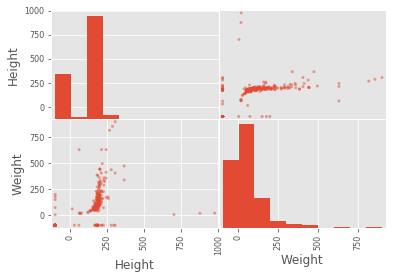

In [8]:
pd.plotting.scatter_matrix(heroes_df)

Text(0, 0.5, 'Height')

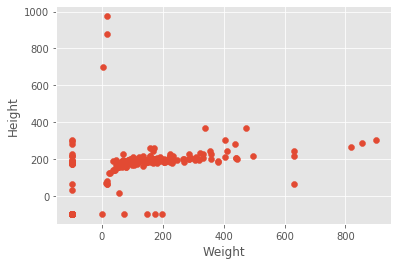

In [9]:
plt.scatter(heroes_df.Weight,heroes_df.Height)
plt.xlabel('Weight')
plt.ylabel('Height')

In [10]:
display(heroes_df[heroes_df.Weight < 0].Height.value_counts(normalize=True))
display(heroes_df[heroes_df.Height < 0].Weight.value_counts(normalize=True))

-99.0     0.902222
 183.0    0.022222
 170.0    0.013333
 188.0    0.013333
 213.0    0.008889
 304.8    0.004444
 226.0    0.004444
 279.0    0.004444
 297.0    0.004444
 193.0    0.004444
 185.0    0.004444
 30.5     0.004444
 178.0    0.004444
 61.0     0.004444
Name: Height, dtype: float64

-99.0     0.975962
 149.0    0.004808
 198.0    0.004808
 176.0    0.004808
 2.0      0.004808
 72.0     0.004808
Name: Weight, dtype: float64

255    975.0
272    876.0
302    701.0
Name: Height, dtype: float64

[255, 272, 302]


Text(0, 0.5, 'Height')

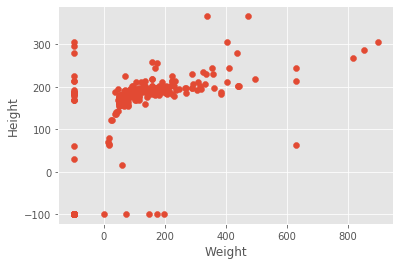

In [11]:
display(heroes_df.loc[heroes_df.Height > 400,'Height'])
h_outliers_list = list(heroes_df.loc[heroes_df.Height > 400,'Height'].index)
print(h_outliers_list)
heroes_df.drop(h_outliers_list, axis=0, inplace=True)
plt.scatter(heroes_df.Weight,heroes_df.Height)
plt.xlabel('Weight')
plt.ylabel('Height')

In [12]:
display(heroes_df.describe())
#display(heroes_df[(heroes_df.Height > 0) & (heroes_df.Weight > 0)].describe())
#display(heroes_df[(heroes_df.Height <= 0) & (heroes_df.Weight <= 0)].describe())
display(heroes_df[(heroes_df.Height > 0)].describe())
display(heroes_df[(heroes_df.Height > 0)].Weight.value_counts(normalize=True))

,Height,Weight
count,716.000000,716.000000
mean,101.310056,46.325419
std,130.499839,130.930661
min,-99.000000,-99.000000
25%,-99.000000,-99.000000
50%,175.000000,63.000000
75%,185.000000,91.000000
max,366.000000,900.000000


,Height,Weight
count,508.000000,508.000000
mean,183.326772,103.679134
std,28.561755,110.992019
min,15.200000,-99.000000
25%,173.000000,59.000000
50%,183.000000,81.000000
75%,188.000000,104.000000
max,366.000000,900.000000


 54.0     0.045276
 79.0     0.045276
 81.0     0.043307
-99.0     0.043307
 90.0     0.037402
            ...   
 36.0     0.001969
 236.0    0.001969
 360.0    0.001969
 116.0    0.001969
 855.0    0.001969
Name: Weight, Length: 130, dtype: float64

4     -99.0
6     -99.0
14    -99.0
15    -99.0
18    -99.0
       ... 
711   -99.0
712   -99.0
713   -99.0
715   -99.0
723   -99.0
Name: Height, Length: 208, dtype: float64

[4, 6, 14, 15, 18, 21, 23, 26, 32, 35, 45, 50, 53, 54, 57, 58, 62, 64, 66, 76, 77, 79, 81, 83, 84, 87, 88, 89, 90, 93, 99, 100, 112, 115, 116, 120, 122, 123, 125, 127, 128, 130, 132, 134, 142, 143, 146, 151, 153, 158, 159, 160, 163, 167, 169, 177, 178, 181, 182, 183, 188, 191, 192, 194, 198, 199, 202, 209, 219, 227, 232, 234, 238, 242, 243, 251, 252, 254, 259, 261, 275, 276, 277, 280, 281, 282, 287, 289, 290, 291, 303, 309, 317, 325, 326, 341, 346, 347, 356, 358, 359, 361, 363, 364, 365, 374, 376, 380, 382, 383, 384, 385, 387, 390, 398, 399, 402, 404, 410, 411, 417, 419, 420, 424, 426, 427, 436, 437, 440, 447, 449, 450, 453, 454, 458, 459, 461, 464, 465, 466, 469, 481, 486, 488, 492, 493, 494, 499, 503, 506, 507, 508, 509, 511, 512, 515, 516, 520, 526, 530, 535, 536, 541, 543, 550, 554, 555, 556, 560, 561, 567, 577, 582, 584, 595, 597, 598, 599, 602, 605, 608, 610, 615, 616, 617, 618, 619, 626, 631, 633, 638, 647, 649, 652, 653, 654, 664, 671, 675, 677, 696, 697, 702, 711, 712, 713, 71

Text(0, 0.5, 'Height')

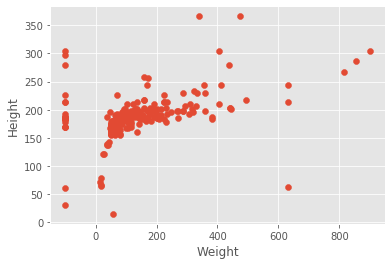

In [13]:
display(heroes_df.loc[heroes_df.Height <= 0,'Height'])
h_neg_list = list(heroes_df.loc[heroes_df.Height <= 0,'Height'].index)
print(h_neg_list)
heroes_df.drop(h_neg_list, axis=0, inplace=True)
plt.scatter(heroes_df.Weight,heroes_df.Height)
plt.xlabel('Weight')
plt.ylabel('Height')

In [14]:
display(heroes_df.Weight.agg(['mean','median','std']))
display(heroes_df[heroes_df.Weight > 0].Weight.agg(['mean','median','std']))

mean      103.679134
median     81.000000
std       110.992019
Name: Weight, dtype: float64

mean      112.853909
median     81.000000
std       104.548165
Name: Weight, dtype: float64

31    -99.0
72    -99.0
121   -99.0
126   -99.0
152   -99.0
206   -99.0
231   -99.0
296   -99.0
307   -99.0
328   -99.0
351   -99.0
353   -99.0
366   -99.0
372   -99.0
377   -99.0
425   -99.0
435   -99.0
557   -99.0
576   -99.0
641   -99.0
692   -99.0
730   -99.0
Name: Weight, dtype: float64

[-99.0, -99.0, -99.0, -99.0, -99.0, -99.0, -99.0, -99.0, -99.0, -99.0, -99.0, -99.0, -99.0, -99.0, -99.0, -99.0, -99.0, -99.0, -99.0, -99.0, -99.0, -99.0]
[81.0, 81.0, 81.0, 81.0, 81.0, 81.0, 81.0, 81.0, 81.0, 81.0, 81.0, 81.0, 81.0, 81.0, 81.0, 81.0, 81.0, 81.0, 81.0, 81.0, 81.0, 81.0]


Text(0, 0.5, 'Height')

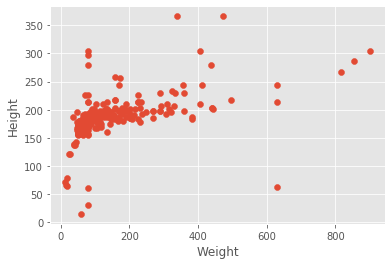

In [15]:
display(heroes_df.loc[heroes_df.Weight < 0,'Weight'])
w_neg_list = list(heroes_df.loc[heroes_df.Weight < 0,'Weight'])
print(w_neg_list)
w_median_list = list(heroes_df.Weight.median() for i in range(0,len(w_neg_list)))
print(w_median_list)
heroes_df.Weight.replace(w_neg_list,w_median_list,inplace=True)
plt.scatter(heroes_df.Weight,heroes_df.Height)
plt.xlabel('Weight')
plt.ylabel('Height')

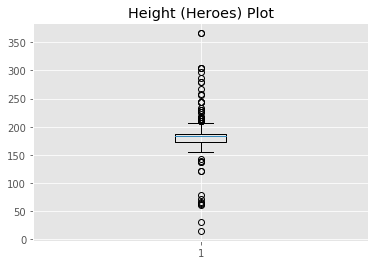

In [16]:
plt.boxplot(heroes_df.Height)
plt.title ("Height (Heroes) Plot")
plt.show()

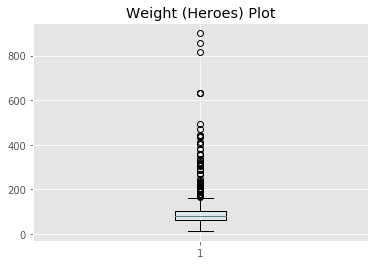

In [17]:
plt.boxplot(heroes_df.Weight)
plt.title ("Weight (Heroes) Plot")
plt.show()

## Joining, Grouping, and Aggregating

In the cell below, join the two DataFrames.  Think about which sort of join you should use, as well as which columns you should join on.  Rename columns and manipulate as needed.  

**_HINT:_** Consider the possibility that the columns you choose to join on contain duplicate entries. If that is the case, devise a strategy to deal with the duplicates.

**_HINT:_** If the join throws an error message, consider setting the column you want to join on as the index for each DataFrame.  

In [18]:
display(powers_df.isna().any().any())
powers_duplicates = powers_df[powers_df.duplicated()]
print(len(powers_duplicates))
display(powers_duplicates.head())
display(powers_df.shape)
powers_df.head(10)

False

0


,hero_names,Agility,Accelerated Healing,Lantern Power Ring,Dimensional Awareness,Cold Resistance,Durability,Stealth,Energy Absorption,Flight,...,Web Creation,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient


(667, 168)

,hero_names,Agility,Accelerated Healing,Lantern Power Ring,Dimensional Awareness,Cold Resistance,Durability,Stealth,Energy Absorption,Flight,...,Web Creation,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient
0,3-D Man,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,A-Bomb,False,True,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,Abe Sapien,True,True,False,False,True,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,Abin Sur,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,Abomination,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,Abraxas,False,False,False,True,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
6,Absorbing Man,False,False,False,False,True,True,False,True,False,...,False,False,False,False,False,False,False,False,False,False
7,Adam Monroe,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8,Adam Strange,False,False,False,False,False,True,True,False,True,...,False,False,False,False,False,False,False,False,False,False
9,Agent Bob,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False


In [19]:
display(heroes_df.isna().any().any())
heroes_duplicates = heroes_df[heroes_df.duplicated(subset='name')]
print(len(heroes_duplicates))
display(heroes_duplicates.head())
display(heroes_duplicates.tail())

False

8


,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight
48,Atlas,Male,blue,God / Eternal,Brown,198.0,DC Comics,-,bad,126.0
69,Batman,Male,blue,Human,Black,178.0,DC Comics,-,good,77.0
97,Black Canary,Female,blue,Metahuman,Blond,170.0,DC Comics,-,good,59.0
156,Captain Marvel,Male,blue,Human,Black,193.0,DC Comics,-,good,101.0
497,Nova,Female,white,Human / Cosmic,Red,163.0,Marvel Comics,gold,good,59.0


,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight
156,Captain Marvel,Male,blue,Human,Black,193.0,DC Comics,-,good,101.0
497,Nova,Female,white,Human / Cosmic,Red,163.0,Marvel Comics,gold,good,59.0
623,Spider-Man,-,red,Human,Brown,178.0,Marvel Comics,-,good,77.0
624,Spider-Man,Male,brown,Human,Black,157.0,Marvel Comics,-,good,56.0
674,Toxin,Male,black,Symbiote,Blond,191.0,Marvel Comics,-,good,117.0


In [20]:
# Drop duplicate names
display("before dropping:",heroes_df.shape)
heroes_df.drop_duplicates(subset='name', inplace=True)
# Reset index values
heroes_df.reset_index(drop=True, inplace=True)
display("after dropping",heroes_df.shape)

'before dropping:'

(508, 10)

'after dropping'

(500, 10)

In [42]:
powers_df.rename(columns={'hero_names':'name'}, inplace=True)
powers_df  = powers_df.astype('str')
heroes_and_powers_df = powers_df.set_index('name').join(heroes_df.set_index('name'), how='inner')
heroes_and_powers_df.head(50)

,Agility,Accelerated Healing,Lantern Power Ring,Dimensional Awareness,Cold Resistance,Durability,Stealth,Energy Absorption,Flight,Danger Sense,...,Omniscient,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight
name,,,,,,,,,,,,,,,,,,,,,
A-Bomb,False,True,False,False,False,True,False,False,False,False,...,False,Male,yellow,Human,No Hair,203.0,Marvel Comics,-,good,441.0
Abe Sapien,True,True,False,False,True,True,False,False,False,False,...,False,Male,blue,Icthyo Sapien,No Hair,191.0,Dark Horse Comics,blue,good,65.0
Abin Sur,False,False,True,False,False,False,False,False,False,False,...,False,Male,blue,Ungaran,No Hair,185.0,DC Comics,red,good,90.0
Abomination,False,True,False,False,False,False,False,False,False,False,...,False,Male,green,Human / Radiation,No Hair,203.0,Marvel Comics,-,bad,441.0
Absorbing Man,False,False,False,False,True,True,False,True,False,False,...,False,Male,blue,Human,No Hair,193.0,Marvel Comics,-,bad,122.0
Adam Strange,False,False,False,False,False,True,True,False,True,False,...,False,Male,blue,Human,Blond,185.0,DC Comics,-,good,88.0
Agent Bob,False,False,False,False,False,False,True,False,False,False,...,False,Male,brown,Human,Brown,178.0,Marvel Comics,-,good,81.0
Agent Zero,False,False,False,False,False,False,False,True,False,False,...,False,Male,-,-,-,191.0,Marvel Comics,-,good,104.0
Air-Walker,False,False,False,False,False,False,False,False,True,False,...,False,Male,blue,-,White,188.0,Marvel Comics,-,bad,108.0


In the cell below, subset male and female heroes into different dataframes.  Create a scatterplot of the height and weight of each hero, with weight as the y-axis.  Plot both the male and female heroes subset into each dataframe, and make the color for each point in the scatterplot correspond to the gender of the superhero.

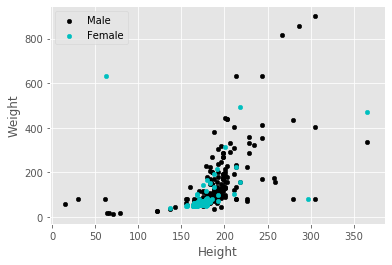

In [43]:
male_heroes_df = heroes_df[heroes_df.Gender == 'Male']
female_heroes_df = heroes_df[heroes_df.Gender == 'Female']

ax = male_heroes_df.plot.scatter(x='Height', y='Weight', c='k', label='Male')
female_heroes_df.plot.scatter(x='Height', y='Weight', c='c', label='Female', ax=ax)

## Some Initial Investigation

Next, slice the DataFrame as needed and visualize the distribution of heights and weights by gender.  You should have 4 total plots.  

In the cell below:

* Slice the DataFrame into separate DataFrames by gender
* Complete the `show_distplot()` function.  This helper function should take in a DataFrame, a string containing the gender we want to visualize, and the column name we want to visualize by gender. The function should display a distplot visualization from seaborn of the column/gender combination.  

Hint: Don't forget to check the [seaborn documentation for distplot](https://seaborn.pydata.org/generated/seaborn.distplot.html) if you have questions about how to use it correctly! 

In [44]:
def show_distplot(dataframe, gender, column_name):
    plt.plot()
    dataframe[column_name].hist()
    plt.title('Distribution of {} for {} heroes'.format(column_name, gender))
    plt.xlabel(column_name)
    plt.ylabel('Probability Density')
    plt.show()
    pass

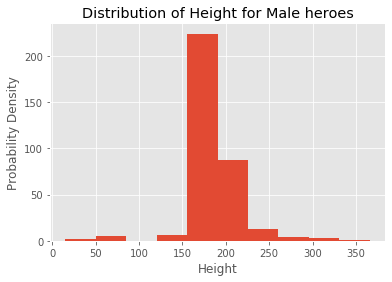

Mean height for male heroes: 186.98695652173913
Median height for male heroes: 185.0


In [45]:
# Male Height
show_distplot(male_heroes_df, 'Male', 'Height')
print('Mean height for male heroes: {}'.format(male_heroes_df.Height.mean()))
print('Median height for male heroes: {}'.format(male_heroes_df.Height.median()))

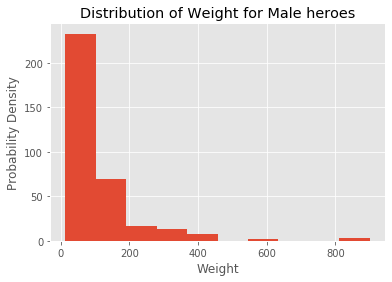

Mean weight for male heroes: 124.81739130434782
Median weight for male heroes: 88.0


In [46]:
# Male Weight
show_distplot(male_heroes_df, 'Male', 'Weight')
print('Mean weight for male heroes: {}'.format(male_heroes_df.Weight.mean()))
print('Median weight for male heroes: {}'.format(male_heroes_df.Weight.median()))

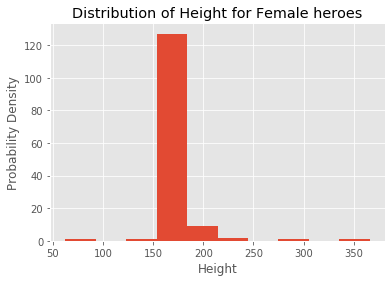

Mean height for female heroes: 174.79929577464787
Median height for female heroes: 170.0


In [47]:
# Female Height
show_distplot(female_heroes_df, 'Female', 'Height')
print('Mean height for female heroes: {}'.format(female_heroes_df.Height.mean()))
print('Median height for female heroes: {}'.format(female_heroes_df.Height.median()))

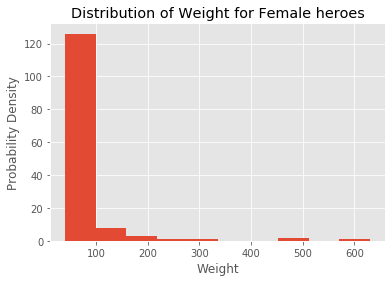

Mean weight for female heroes: 78.66901408450704
Median weight for female heroes: 88.0


In [48]:
# Female Weight
show_distplot(female_heroes_df, 'Female', 'Weight')
print('Mean weight for female heroes: {}'.format(female_heroes_df.Weight.mean()))
print('Median weight for female heroes: {}'.format(male_heroes_df.Weight.median()))

Discuss your findings from the plots above, with respect to the distribution of height and weight by gender.  Your explanation should include a discussion of any relevant summary statistics, including mean, median, mode, and the overall shape of each distribution.  

Write your answer below this line:
____________________________________________________________________________________________________________________________



### Sample Question: Most Common Powers

The rest of this notebook will be left to you to investigate the dataset by formulating your own questions, and then seeking answers using pandas and numpy.  Every answer should include some sort of visualization, when appropriate. Before moving on to formulating your own questions, use the dataset to answer the following questions about superhero powers:

* What are the 5 most common powers overall?
* What are the 5 most common powers in the Marvel Universe?
* What are the 5 most common powers in the DC Universe?

In [49]:
display(powers_df.columns.values[1])
display(heroes_df.columns.values)
display(heroes_and_powers_df.columns.values[0])

'Agility'

array(['name', 'Gender', 'Eye color', 'Race', 'Hair color', 'Height',
       'Publisher', 'Skin color', 'Alignment', 'Weight'], dtype=object)

'Agility'

In [51]:
# Top 5 common powers overall
def top5_powers(dataframe):
    dataframe_custom = dataframe.copy()
    for col in dataframe.columns:
        dataframe_custom[col] = dataframe[col].map({'True': 1, 'False': 0})
        
    power_counts_dict = dict(dataframe_custom.sum())
    #print(power_counts_dict)

    power_counts_sorted = sorted(power_counts_dict.items(), key=lambda x:x[1], reverse=True)
    print(power_counts_sorted)
    
    return power_counts_sorted[:5]

top5_powers(heroes_and_powers_df)

[('Super Strength', 274.0), ('Stamina', 229.0), ('Durability', 207.0), ('Super Speed', 196.0), ('Agility', 195.0), ('Flight', 156.0), ('Reflexes', 142.0), ('Accelerated Healing', 137.0), ('Intelligence', 114.0), ('Energy Blasts', 112.0), ('Stealth', 93.0), ('Marksmanship', 93.0), ('Longevity', 90.0), ('Weapons Master', 84.0), ('Invulnerability', 82.0), ('Telepathy', 72.0), ('Enhanced Senses', 71.0), ('Force Fields', 66.0), ('Energy Absorption', 52.0), ('Enhanced Hearing', 51.0), ('Teleportation', 50.0), ('Weapon-based Powers', 49.0), ('Jump', 48.0), ('Shapeshifting', 47.0), ('Immortality', 44.0), ('Telekinesis', 43.0), ('Toxin and Disease Resistance', 43.0), ('Psionic Powers', 42.0), ('Natural Weapons', 42.0), ('Size Changing', 38.0), ('Cold Resistance', 37.0), ('Animal Oriented Powers', 35.0), ('Heat Resistance', 34.0), ('Magic', 33.0), ('Vision - Telescopic', 33.0), ('Molecular Manipulation', 32.0), ('Energy Manipulation', 32.0), ('Energy Beams', 31.0), ('Telepathy Resistance', 31.0)

[('Super Strength', 274.0),
 ('Stamina', 229.0),
 ('Durability', 207.0),
 ('Super Speed', 196.0),
 ('Agility', 195.0)]

In [52]:
# Top 5 common powers in Marvel Universe
marvel_df = heroes_and_powers_df[heroes_and_powers_df.Publisher == 'Marvel Comics']
top5_powers(marvel_df)

[('Super Strength', 179.0), ('Stamina', 138.0), ('Durability', 136.0), ('Super Speed', 120.0), ('Agility', 115.0), ('Reflexes', 91.0), ('Flight', 90.0), ('Accelerated Healing', 87.0), ('Energy Blasts', 75.0), ('Longevity', 54.0), ('Intelligence', 50.0), ('Telepathy', 46.0), ('Stealth', 42.0), ('Marksmanship', 42.0), ('Invulnerability', 41.0), ('Enhanced Senses', 38.0), ('Weapons Master', 35.0), ('Force Fields', 34.0), ('Psionic Powers', 34.0), ('Energy Absorption', 33.0), ('Teleportation', 33.0), ('Natural Weapons', 31.0), ('Weapon-based Powers', 29.0), ('Telekinesis', 28.0), ('Shapeshifting', 28.0), ('Immortality', 27.0), ('Toxin and Disease Resistance', 27.0), ('Animal Oriented Powers', 26.0), ('Wallcrawling', 26.0), ('Jump', 25.0), ('Molecular Manipulation', 25.0), ('Telepathy Resistance', 25.0), ('Heat Resistance', 24.0), ('Cold Resistance', 23.0), ('Magic', 22.0), ('Size Changing', 21.0), ('Enhanced Hearing', 21.0), ('Energy Manipulation', 21.0), ('Illusions', 20.0), ('Astral Proj

[('Super Strength', 179.0),
 ('Stamina', 138.0),
 ('Durability', 136.0),
 ('Super Speed', 120.0),
 ('Agility', 115.0)]

In [53]:
# Top 5 common powers in DC universe
dc_df = heroes_and_powers_df[heroes_and_powers_df.Publisher == 'DC Comics']
top5_powers(dc_df)

[('Super Strength', 74.0), ('Stamina', 64.0), ('Flight', 60.0), ('Super Speed', 58.0), ('Agility', 55.0), ('Durability', 55.0), ('Intelligence', 49.0), ('Accelerated Healing', 36.0), ('Reflexes', 35.0), ('Stealth', 34.0), ('Marksmanship', 34.0), ('Weapons Master', 31.0), ('Energy Blasts', 30.0), ('Invulnerability', 30.0), ('Force Fields', 25.0), ('Longevity', 24.0), ('Enhanced Senses', 24.0), ('Enhanced Hearing', 23.0), ('Energy Absorption', 19.0), ('Energy Constructs', 18.0), ('Telepathy', 17.0), ('Weapon-based Powers', 16.0), ('Phasing', 15.0), ('Self-Sustenance', 15.0), ('Size Changing', 14.0), ('Jump', 14.0), ('Toxin and Disease Resistance', 14.0), ('Energy Beams', 13.0), ('Vision - Telescopic', 13.0), ('Vision - X-Ray', 13.0), ('Peak Human Condition', 12.0), ('Teleportation', 11.0), ('Shapeshifting', 11.0), ('Power Suit', 11.0), ('Time Travel', 11.0), ('Vision - Night', 11.0), ('Cold Resistance', 10.0), ('Immortality', 10.0), ('Invisibility', 10.0), ('Vision - Microscopic', 10.0),

[('Super Strength', 74.0),
 ('Stamina', 64.0),
 ('Flight', 60.0),
 ('Super Speed', 58.0),
 ('Agility', 55.0)]

In [54]:
def top5_barchart(top5_list, publisher=None):
    
    powers = [i[0] for i in top5_list]
    values = [i[1] for i in top5_list]

    plt.clf()
    plt.figure(figsize=(15, 8))
    bar_positions = np.arange(len(powers))
    plt.bar(bar_positions, values)
    plt.xticks(bar_positions, powers)
    if publisher:
        plt.title('Top 5 Powers in {} Universe'.format(publisher))
    else:
        plt.title('Top 5 Powers in Superheroes Dataset')
    plt.show()

[('Super Strength', 274.0), ('Stamina', 229.0), ('Durability', 207.0), ('Super Speed', 196.0), ('Agility', 195.0), ('Flight', 156.0), ('Reflexes', 142.0), ('Accelerated Healing', 137.0), ('Intelligence', 114.0), ('Energy Blasts', 112.0), ('Stealth', 93.0), ('Marksmanship', 93.0), ('Longevity', 90.0), ('Weapons Master', 84.0), ('Invulnerability', 82.0), ('Telepathy', 72.0), ('Enhanced Senses', 71.0), ('Force Fields', 66.0), ('Energy Absorption', 52.0), ('Enhanced Hearing', 51.0), ('Teleportation', 50.0), ('Weapon-based Powers', 49.0), ('Jump', 48.0), ('Shapeshifting', 47.0), ('Immortality', 44.0), ('Telekinesis', 43.0), ('Toxin and Disease Resistance', 43.0), ('Psionic Powers', 42.0), ('Natural Weapons', 42.0), ('Size Changing', 38.0), ('Cold Resistance', 37.0), ('Animal Oriented Powers', 35.0), ('Heat Resistance', 34.0), ('Magic', 33.0), ('Vision - Telescopic', 33.0), ('Molecular Manipulation', 32.0), ('Energy Manipulation', 32.0), ('Energy Beams', 31.0), ('Telepathy Resistance', 31.0)

<Figure size 432x288 with 0 Axes>

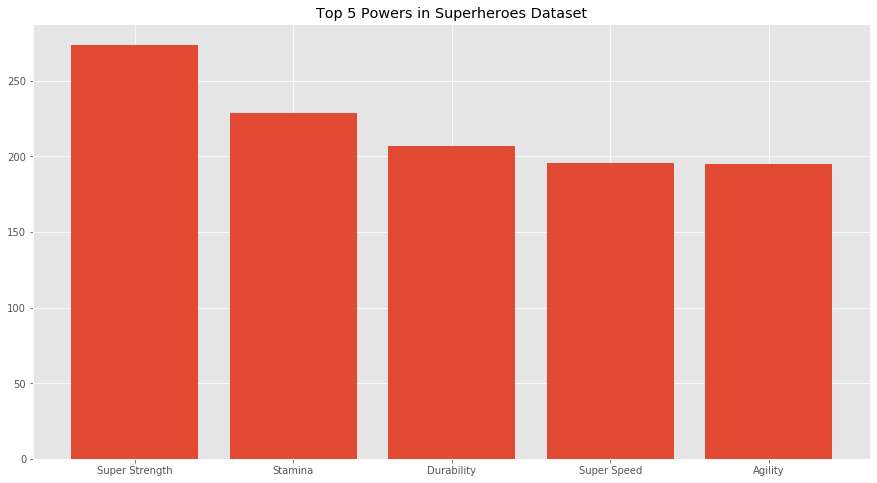

In [55]:
top5_barchart(top5_powers(heroes_and_powers_df))

[('Super Strength', 179.0), ('Stamina', 138.0), ('Durability', 136.0), ('Super Speed', 120.0), ('Agility', 115.0), ('Reflexes', 91.0), ('Flight', 90.0), ('Accelerated Healing', 87.0), ('Energy Blasts', 75.0), ('Longevity', 54.0), ('Intelligence', 50.0), ('Telepathy', 46.0), ('Stealth', 42.0), ('Marksmanship', 42.0), ('Invulnerability', 41.0), ('Enhanced Senses', 38.0), ('Weapons Master', 35.0), ('Force Fields', 34.0), ('Psionic Powers', 34.0), ('Energy Absorption', 33.0), ('Teleportation', 33.0), ('Natural Weapons', 31.0), ('Weapon-based Powers', 29.0), ('Telekinesis', 28.0), ('Shapeshifting', 28.0), ('Immortality', 27.0), ('Toxin and Disease Resistance', 27.0), ('Animal Oriented Powers', 26.0), ('Wallcrawling', 26.0), ('Jump', 25.0), ('Molecular Manipulation', 25.0), ('Telepathy Resistance', 25.0), ('Heat Resistance', 24.0), ('Cold Resistance', 23.0), ('Magic', 22.0), ('Size Changing', 21.0), ('Enhanced Hearing', 21.0), ('Energy Manipulation', 21.0), ('Illusions', 20.0), ('Astral Proj

<Figure size 432x288 with 0 Axes>

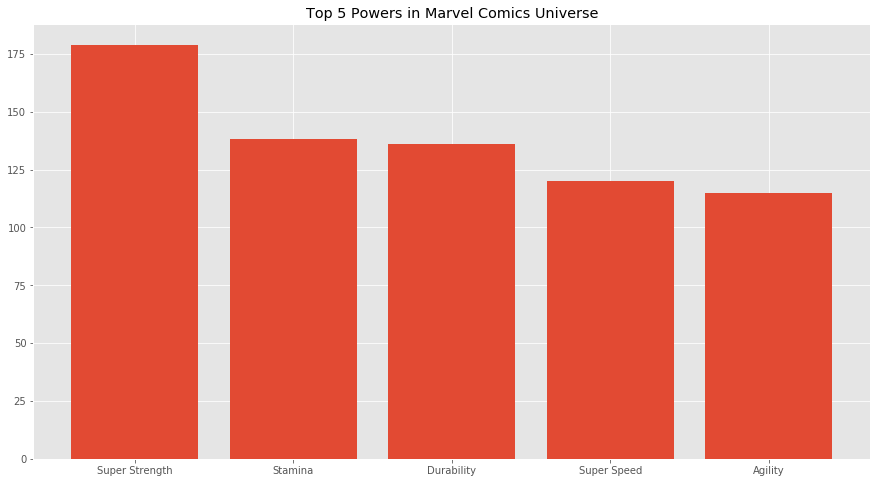

In [56]:
top5_barchart(top5_powers(marvel_df),'Marvel Comics')

[('Super Strength', 74.0), ('Stamina', 64.0), ('Flight', 60.0), ('Super Speed', 58.0), ('Agility', 55.0), ('Durability', 55.0), ('Intelligence', 49.0), ('Accelerated Healing', 36.0), ('Reflexes', 35.0), ('Stealth', 34.0), ('Marksmanship', 34.0), ('Weapons Master', 31.0), ('Energy Blasts', 30.0), ('Invulnerability', 30.0), ('Force Fields', 25.0), ('Longevity', 24.0), ('Enhanced Senses', 24.0), ('Enhanced Hearing', 23.0), ('Energy Absorption', 19.0), ('Energy Constructs', 18.0), ('Telepathy', 17.0), ('Weapon-based Powers', 16.0), ('Phasing', 15.0), ('Self-Sustenance', 15.0), ('Size Changing', 14.0), ('Jump', 14.0), ('Toxin and Disease Resistance', 14.0), ('Energy Beams', 13.0), ('Vision - Telescopic', 13.0), ('Vision - X-Ray', 13.0), ('Peak Human Condition', 12.0), ('Teleportation', 11.0), ('Shapeshifting', 11.0), ('Power Suit', 11.0), ('Time Travel', 11.0), ('Vision - Night', 11.0), ('Cold Resistance', 10.0), ('Immortality', 10.0), ('Invisibility', 10.0), ('Vision - Microscopic', 10.0),

<Figure size 432x288 with 0 Axes>

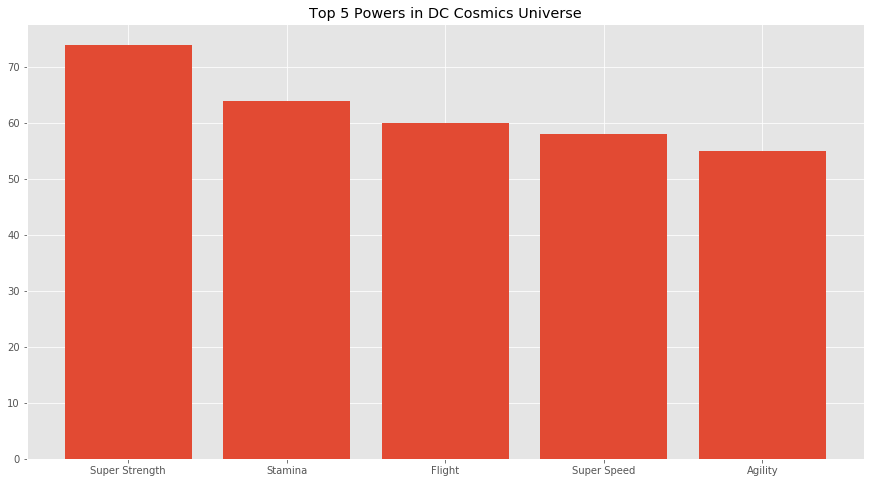

In [57]:
top5_barchart(top5_powers(dc_df),'DC Cosmics')

Analyze the results you found above to answer the following question:

How do the top 5 powers in the Marvel and DC universes compare?  Are they similar, or are there significant differences? How do they compare to the overall trends in the entire Superheroes dataset?

Write your answer below this line:
____________________________________________________________________________________________________________________________


### Your Own Investigation

For the remainder of this lab, you'll be focusing on coming up with and answering your own question, just like we did above.  Your question should not be overly simple, and should require both descriptive statistics and data visualization to answer.  In case you're unsure of what questions to ask, some sample questions have been provided below.

Pick one of the following questions to investigate and answer, or come up with one of your own!

* Which powers have the highest chance of co-occurring in a hero (e.g. super strength and flight), and does this differ by gender?
* Is there a relationship between a hero's height and weight and their powerset?
* What is the distribution of skin colors amongst alien heroes?

Explain your question below this line:
____________________________________________________________________________________________________________________________



Some sample cells have been provided to give you room to work. If you need to create more cells, you can do this easily by:

1. Highlighting a cell and then pressing `esc` to enter command mode.
1. Pressing `b` to add a cell below the currently highlighted cell, or `a` to add one above it.  

Be sure to include thoughtful, well-labeled visualizations to back up your analysis!

## Summary

In this lab, we demonstrated our mastery of:
* Using all of our Pandas knowledge to date to clean the dataset and deal with null values
* Using Queries and aggregations to group the data into interesting subsets as needed
* Using descriptive statistics and data visualization to find answers to questions we may have about the data